### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/aapllll/AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [5]:
df1=df.reset_index()['close']

In [6]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

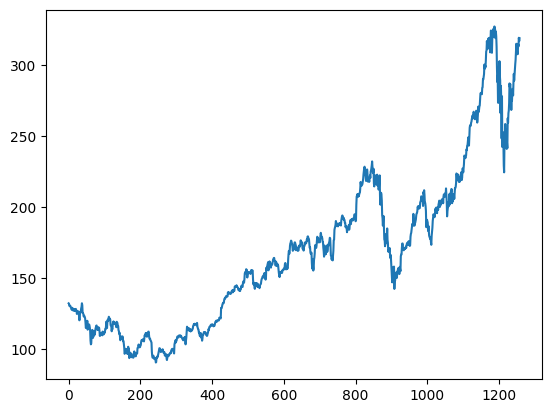

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 441)

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-02-28 03:59:09.924399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 03:59:09.924497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 03:59:10.060175: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0292 - val_loss: 0.0785
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0041 - val_loss: 0.0066
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8760e-04 - val_loss: 0.0043
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.3868e-04 - val_loss: 0.0060
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.8048e-04 - val_loss: 0.0080
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.4933e-04 - val_loss: 0.0075
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.6696e-04 - val_loss: 0.0074
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.1682e-04 - val_loss: 0.0058
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.7657e-04 - val_loss: 0.0044
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.8509e-04 - val_loss: 0.0050
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.3360e-04 - val_loss: 0.0049
Epoch 12/100
12/

In [24]:
import tensorflow as tf

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.6854384691364

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

238.05023312284206

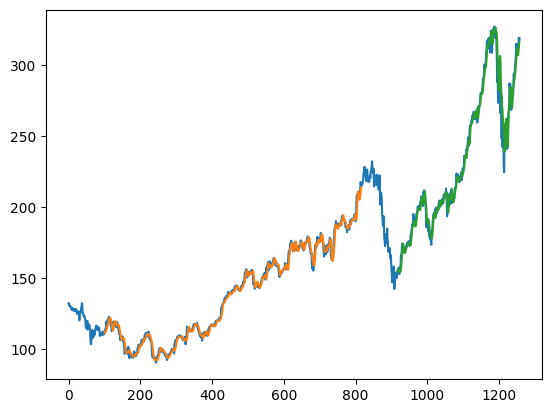

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

441

In [31]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1
    
print(lst_output)

[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[0.9661455]
100
[[0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154418945], [0.9661455154

In [34]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [35]:
import matplotlib.pyplot as plt

In [36]:
len(df1)

1258

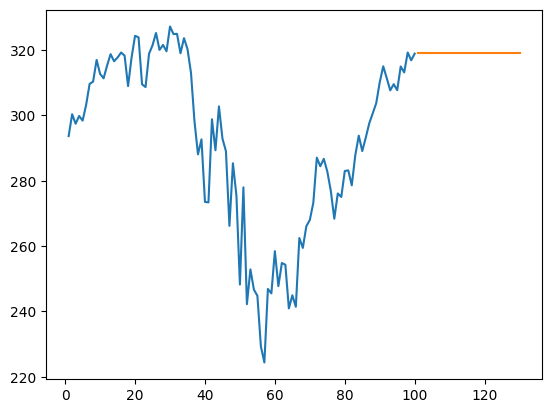

In [37]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

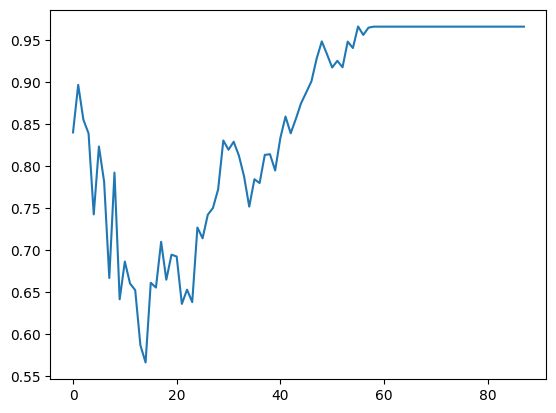

In [38]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [39]:
df3=scaler.inverse_transform(df3).tolist()

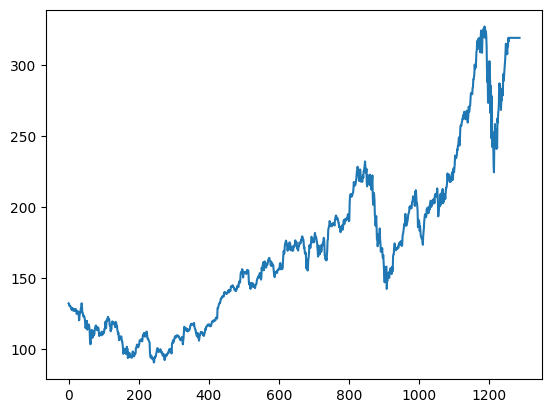

In [40]:
plt.plot(df3)